# Data cleaning

##  Imports

In [2]:
%load_ext autoreload
%autoreload 2
# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib  for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
sns.set(font_scale = 1.5)
sns.set_style('ticks')
sns.set()

%matplotlib inline

##  Load original data

In [3]:
df = pd.read_csv('../raw_data/NCDB_1999_to_2017.csv')
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [4]:
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,1,1,20,2,02,34,UU,1,5,...,06,1990,01,M,41,11,1,UU,1,752
1,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,01,M,19,11,1,UU,1,752
2,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,02,F,20,13,2,02,2,752
3,1999,1,1,08,2,01,01,UU,5,3,...,01,1986,01,M,46,11,1,UU,1,753
4,1999,1,1,08,2,01,01,UU,5,3,...,NN,NNNN,01,M,05,99,2,UU,3,753


Please note that in each attribute the values with U, UU, UUU, UUUU represent Unknown. X, XX, XXX, XXXX represent Jurisdiction does not provide this data element. Q, QQ, QQQ, QQQQ represent Choice is other than the preceding values.  N, NN, NNN, NNNN represent Data element is not applicable. Please see the explanatory docx file in the Data folder for a full explanation of the attributes and their values.

In [5]:
# Rename the class variable
df =df.rename(columns ={'C_SEV':'FATAL'})

In [6]:
# Data shape
df.shape

(6772563, 23)

In [7]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6772563 entries, 0 to 6772562
Data columns (total 23 columns):
C_YEAR    int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
FATAL     int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE    int64
dtypes: int64(3), object(20)
memory usage: 1.2+ GB


- There are only 3 numerical attributes out of 23 attributes.

The data show no missing values because some of the attributes contain inconsistent formats like U, X, N, and Q as stated above. 

In [8]:
# Replace letters with numpy nan
letter_list = ['U', 'UU', 'UUU', 'UUUU', 'Q', 'QQ', 'QQQ', 'QQQQ', 
               'N', 'NN', 'NNN', 'NNNN', 'X', 'XX', 'XXX', 'XXXX']
df = df.replace(letter_list, np.nan)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6772563 entries, 0 to 6772562
Data columns (total 23 columns):
C_YEAR    int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
FATAL     int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE    int64
dtypes: int64(3), object(20)
memory usage: 1.2+ GB


In [10]:
# Percentage of missing values
missing_values = (df.isnull().sum()/df.shape[0])*100

# Create a dataframe of missing values
Missing_df =pd.DataFrame({'Variable': missing_values.index, 
                          'Percentage of missing values': missing_values.values})
Missing_df.sort_values(by = 'Percentage of missing values', ascending = False)

,Variable,Percentage of missing values
20,P_SAFE,21.193838
7,C_RCFG,10.663408
14,V_YEAR,9.899945
6,C_CONF,8.005655
10,C_RALN,7.525290
17,P_AGE,6.762344
19,P_ISEV,6.414484
11,C_TRAF,5.314738
13,V_TYPE,4.903092
16,P_SEX,4.492007


- Indeed, there are lots of missing values in the attributes.

- P_SAFE has the largest percentage of missing values followed by C_RCFG

- There are no missing values in C_YEAR,  C_CASE, and FATAL (class variable), 

##  Convert variables to the correct format

Based on the data information, there are many categorical variables encoded as numbers. We will now convert them  to the correct description to better understand the data

### Day of week

In [11]:
df.C_WDAY.unique()

array([1, 2, 3, 4, 5, 6, 7, '7', nan, '1', '2', '3', '4', '5', '6'],
      dtype=object)

In [12]:
week_dict = {'1': 'Monday','2': 'Tuesday','3':'Wednesday','4':'Thursday',
             '5':'Friday', '6': 'Saturday', '7':'Sunday',1: 'Monday',2: 'Tuesday',3:'Wednesday',
             4:'Thursday',5:'Friday', 6: 'Saturday', 7:'Sunday'} 

In [13]:
df['C_WDAY'] = df['C_WDAY'].replace(week_dict) 

In [14]:
df.C_WDAY.value_counts()

Friday       1153400
Thursday     1009100
Saturday      993132
Wednesday     957246
Tuesday       947966
Monday        898879
Sunday        811476
Name: C_WDAY, dtype: int64

### Month of the year

In [15]:
df.C_MNTH.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '12', nan, '01', '02', '11'],
      dtype=object)

In [16]:
month_dict = {1: 'January', '01': 'January', 2: 'February','02': 'February',3: 'March', 4: 'April',
             5:'May', 6: 'June', 7: 'July',8: 'August', 9: 'September',10: 'october', 11: 'November',
              '11': 'November', 12: 'December', '12': 'December'}

In [17]:
df['C_MNTH'] = df['C_MNTH'].replace(month_dict)

In [18]:
df.C_MNTH.value_counts()

August       630176
July         622086
December     607295
June         600337
october      596323
September    593307
November     578503
January      575882
May          541602
February     492727
March        481139
April        452761
Name: C_MNTH, dtype: int64

- Also the months are encoded as integers  ranging from 1 to 12

### Collision hour

In [19]:
df.C_HOUR.unique()

array(['20', '08', '17', '15', '14', '01', '11', '13', '19', '16', '09',
       '02', '18', '12', '10', '23', '00', '06', '07', '21', nan, '05',
       '22', '03', '04'], dtype=object)

We will convert hour to numeric

In [20]:
df['C_HOUR'] = pd.to_numeric(df['C_HOUR'], errors = 'coerce')

In [21]:
df.C_HOUR.dtypes

dtype('float64')

### Number of vehicles involved in collision

In [22]:
df.C_VEHS.unique()

array(['02', '01', '03', '04', '06', '07', '09', nan, '05', '13', '08',
       '12', '14', '10', '11', '16', 1, 2, 3, 4, 5, 6, 8, 7, 12, 10, '26',
       '71', 19, 25, 9, '21', '27', '15', '35', 15, 13, 26, '22', '41',
       27, 46, 31, 11, '18', 18, 56, '23', 36, 17, 14, 20, 21, '19', 16,
       '29', '25', 77, 28, 38, '38', '17', '32', 35, 22, 33, '54', 72,
       '40', 44, 58, '30', '77', '20', '24', '34', 24, 39, '51', 57, 43,
       37, 47], dtype=object)

The number of vehicles involved in an accident contains inconsistent numbering, e.g '01', '02', and so on. We  will correct this typos and convert the attribute to numeric

In [23]:
df['C_VEHS'] = df['C_VEHS'].replace(['01','02','03','04','05','06','07','08','09'],
                                   [1,2,3,4,5,6,7,8,9])

In [24]:
df['C_VEHS'] = pd.to_numeric(df['C_VEHS'],errors = 'coerce')

In [25]:
df.C_VEHS.dtypes

dtype('float64')

### Collision configuration

In [26]:
df.C_CONF.unique()

array(['34', '01', nan, '04', '31', '21', '23', '03', '02', '33', '24',
       '35', '41', '06', '32', '36', '05', '22', '25'], dtype=object)

In [27]:
coll_dict = {'01': 'Hit a moving object', '02': 'Hit a stationary object', '03': 'Ran off left shoulder',
                 '04': 'Ran off right shoulder', '05': 'Rollover on roadway', '06': 'Any other single-vehicle ',
                 '34': 'Right turn', '31': 'Head-on collision', '21': 'Rear-end collision', 
                  '23': 'left turn conflict', '33': 'Left turn across opposing traffic',
                 '24': 'right turn conflict', '35': 'Right angle collision', '41': 'Hit a parked motor vehicle',
                 '32': 'Approaching side-swipe', 
                  '36': 'Any other two-vehicle - different direction', '22': 'Side swipe', 
                  '25': 'Any other two-vehicle - same direction'}

In [28]:
df['C_CONF'] = df['C_CONF'].replace(coll_dict)

In [29]:
df.C_CONF.value_counts()

Rear-end collision                             2048320
Right angle collision                           994411
Any other single-vehicle                        596787
Any other two-vehicle - different direction     513154
Left turn across opposing traffic               488067
Ran off right shoulder                          245537
Side swipe                                      226425
Hit a stationary object                         221884
Head-on collision                               221694
Ran off left shoulder                           187277
Hit a moving object                             100895
Hit a parked motor vehicle                       92856
left turn conflict                               79588
Right turn                                       67121
right turn conflict                              60441
Approaching side-swipe                           56643
Rollover on roadway                              15359
Any other two-vehicle - same direction           13916
Name: C_CO

### Roadway configuration

In [30]:
df.C_RCFG.unique()

array([nan, '01', '02', '03', '05', '04', '06', '08', '07', '09', '10'],
      dtype=object)

In [31]:
roadway_dict = {'01': 'Non-intersection', '02':'At an intersection', 
                '03': 'Intersection with parking lot entrance', '04': 'Railroad level crossing',
               '05': 'Bridge, overpass, viaduct', '06': 'Tunnel or underpass', '07': 'Passing or climbing lane',
               '08': 'Ramp', '09': 'Traffic circle', '10': 'Express lane of a freeway system'}

In [32]:
df['C_RCFG'] = df['C_RCFG'].replace(roadway_dict)

In [33]:
df.C_RCFG.value_counts()

At an intersection                        3164403
Non-intersection                          2450730
Intersection with parking lot entrance     323683
Bridge, overpass, viaduct                   59411
Railroad level crossing                     26325
Ramp                                        14382
Tunnel or underpass                          7020
Traffic circle                               2662
Passing or climbing lane                     1126
Express lane of a freeway system              635
Name: C_RCFG, dtype: int64

### Weather condition

In [34]:
df.C_WTHR.unique()

array(['1', '5', '3', '4', '7', '2', nan, '6'], dtype=object)

In [35]:
wthr_dict = {'1': 'Clear and sunny', '2': 'Overcast, cloudy but no precipitation', '3': 'Raining',
            '4': 'Snowing', '5': 'Freezing rain, sleet, hail', '6': 'Visibility limitation', '7': 'Strong wind'}

In [36]:
df['C_WTHR'] = df['C_WTHR'].map(wthr_dict)

In [37]:
df.C_WTHR.value_counts()

Clear and sunny                          4733643
Overcast, cloudy but no precipitation     686118
Raining                                   682310
Snowing                                   406111
Visibility limitation                      95960
Freezing rain, sleet, hail                 34864
Strong wind                                17819
Name: C_WTHR, dtype: int64

### Road surface

In [38]:
df.C_RSUR.unique()

array(['5', '3', '2', '4', '1', '6', nan, '7', '9', '8'], dtype=object)

In [39]:
roadsur_dict = {'1':'Dry, normal', '2': 'Wet', '3': 'Snow', '4':'Slush', '5': 'Icy', '6':'Sand/gravel/dirt',
               '7':'Muddy', '8': 'Oil', '9': 'Flooded'}

In [40]:
df['C_RSUR'] = df['C_RSUR'].map(roadsur_dict)

In [41]:
df.C_RSUR.value_counts()

Dry, normal         4472954
Wet                 1230604
Icy                  371520
Snow                 296648
Slush                 84944
Sand/gravel/dirt      29058
Muddy                  6626
Oil                    1372
Flooded                 442
Name: C_RSUR, dtype: int64

### Road alignment

In [42]:
df.C_RALN.unique()

array(['3', '6', '1', nan, '2', '5', '4'], dtype=object)

In [43]:
roadall_dist = {'1':'Straight and level', '2':'Straight with gradient', '3': 'Curved and level',
               '4':'Curved with gradient', '5': 'Top of hill or gradient', '6': 'Bottom of hill or gradient'}

In [44]:
df['C_RALN']= df['C_RALN'].replace(roadall_dist)

In [45]:
df.C_RALN.value_counts()

Straight and level            4847227
Straight with gradient         663332
Curved and level               415627
Curved with gradient           252634
Top of hill or gradient         48413
Bottom of hill or gradient      35675
Name: C_RALN, dtype: int64

### Traffic control

In [46]:
df.C_TRAF.unique()

array(['03', '18', '01', nan, '06', '10', '05', '04', '11', '07', '08',
       '16', '17', '02', '13', '15', '09', '12'], dtype=object)

In [47]:
tracon_dict ={'01': 'Traffic signals fully operational', '02': 'Traffic signals in flashing mode',
             '03': 'Stop sign', '04': 'Yield sign', '05':'Warning sign', '06':'Pedestrian crosswalk',
             '07': 'Police officer', '08': 'School guard, flagman', '09': 'School crossing',
              '10': 'Reduced speed zone', '11': 'No passing zone sign', '12': 'Markings on the road',
             '13': 'School bus stopped with school bus signal lights flashing',
             '15':'Railway crossing with signals, or signals and gates',
             '16': 'Railway crossing with signs only',
             '17': 'Control device not specified', '18': 'No control present'}
df['C_TRAF'] = df['C_TRAF'].map(tracon_dict)

In [48]:
df.C_TRAF.value_counts()

No control present                                           3518144
Traffic signals fully operational                            1896178
Stop sign                                                     755044
Yield sign                                                    105989
Pedestrian crosswalk                                           52653
School guard, flagman                                          28073
Traffic signals in flashing mode                               22208
School bus stopped with school bus signal lights flashing       4929
Warning sign                                                    4611
Control device not specified                                    4572
Railway crossing with signals, or signals and gates             4451
Markings on the road                                            4399
No passing zone sign                                            3863
Reduced speed zone                                              3160
Police officer                    

### Vehicle sequence number

In [49]:
df.V_ID.unique()

array(['01', '02', '99', '03', '04', nan, '05', '06', '07', '08', '09',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '70', '71', 2, 1, 99, 3, 4, 5, 6, 7,
       8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       '72', '73', '74', '83', '85', '86', '75', '76', '77', 42, 43, 44,
       45, 46, 47, 48, 49, 51, 52, 50, 53, 54, 55, 56, 57], dtype=object)

There is a mismatch in the vehicle sequence number, e.g. '01' is 1, '02' is 2 and so on

In [50]:
df['V_ID'] = df['V_ID'].replace(['01','02','03','04','05','06', '07','08','09'],
                               [1,2,3,4,5,6,7,8,9])

In [51]:
# Convert to numeric
df['V_ID'] = pd.to_numeric(df['V_ID'], errors ='coerce')

### Vehicle type

In [52]:
df.V_TYPE.unique()

array(['06', '01', nan, '11', '20', '17', '07', '08', '09', '22', '14',
       '23', '05', '16', '19', '18', '10', '21'], dtype=object)

In [53]:
vehtype_dict ={'01': 'Light Duty Vehicle', '06': 'Other trucks and vans', '11': 'Urban and Intercity Bus',
              '20': 'Construction equipment', '17': 'Bicycle', '07': 'Unit trucks', '08': 'Road tractor',
              '09': 'School bus', '22': 'Snowmobile', '14': 'Motorcycle and moped', '23': 'Street car',
              '05': 'Panel/cargo van', '16': 'Off road vehicles', 
               '19': 'Farm equipment', '18': 'Purpose-built motorhome',
              '10': 'Smaller school bus', '21': 'Fire engine'}
df['V_TYPE'] = df['V_TYPE'].map(vehtype_dict)

In [54]:
df.V_TYPE.value_counts()

Light Duty Vehicle         5581077
Other trucks and vans       193087
Motorcycle and moped        144140
Bicycle                     141776
Unit trucks                 101481
Road tractor                 81219
Panel/cargo van              75876
Urban and Intercity Bus      59947
School bus                   25546
Off road vehicles            11135
Construction equipment        8807
Snowmobile                    5057
Purpose-built motorhome       3540
Street car                    3451
Farm equipment                2323
Smaller school bus            1087
Fire engine                    949
Name: V_TYPE, dtype: int64

### Vehicle model year

In [55]:
df.V_YEAR.unique()

array(['1990', '1987', '1986', nan, '1984', '1991', '1992', '1997',
       '1993', '1985', '1988', '1994', '1995', '1998', '1989', '1996',
       '1983', '1999', '1965', '1977', '1978', '1968', '1981', '1979',
       '1976', '1972', '2000', '1982', '1975', '1973', '1974', '1980',
       '1967', '1970', '1971', '1962', '1969', '1966', '1945', '1963',
       '1960', '1950', '1964', '1959', '1955', '1958', '1903', '1909',
       '1949', '1923', '1961', '1914', '1908', '1953', '1906', '1939',
       '1925', '1948', '1938', '1907', '1952', '1904', '1917', '1912',
       '1944', '1956', '1930', '1931', '1951', '1946', '1947', '1957',
       '1954', '1943', '1901', '1937', '1905', '1935', '1926', '1941',
       '1932', '1920', '1933', '1919', '1915', '1929', '1928', '2001',
       '1913', '1940', '1927', '2002', '1916', '1942', '1918', '2003',
       '1924', '1922', '1934', '2004', '2005', '2006', '2007', '2008',
       '1911', '2009', '2010', '2011', '1936', '2012', '1910', '1921',
       '2

In [56]:
# Convert to numeric
df['V_YEAR'] = pd.to_numeric(df['V_YEAR'], errors = 'coerce')

In [57]:
df['V_YEAR'].value_counts().head()

2000.0    341453
2002.0    323150
2003.0    317580
1998.0    306083
2001.0    300348
Name: V_YEAR, dtype: int64

### Person sequence ID

In [58]:
df.P_ID.unique()

array(['01', '02', '03', '04', '05', '06', nan, '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95', '99'], dtype=object)

In [59]:
df['P_ID'] = df['P_ID'].replace(['01', '02','03','04','05','06','07','08','09'],
                               [1,2,3,4,5,6,7,8,9])

In [60]:
df['P_ID'] = pd.to_numeric(df['P_ID'], errors = 'coerce')

In [61]:
df.P_ID.dtypes

dtype('float64')

### Gender

In [62]:
df.P_SEX.unique()

array(['M', 'F', nan], dtype=object)

In [63]:
df.P_SEX.value_counts()

M    3639636
F    2828703
Name: P_SEX, dtype: int64

- More males are involved in vehicle collision than females

### Person age

In [64]:
df.P_AGE.unique()

array(['41', '19', '20', '46', '05', '28', '21', nan, '61', '56', '34',
       '22', '30', '49', '32', '31', '68', '08', '45', '17', '33', '82',
       '39', '37', '55', '38', '43', '35', '23', '25', '65', '44', '36',
       '70', '50', '40', '27', '26', '15', '53', '16', '13', '14', '12',
       '18', '77', '86', '42', '24', '47', '62', '06', '57', '83', '74',
       '67', '51', '29', '01', '02', '54', '71', '10', '79', '63', '58',
       '48', '60', '07', '64', '75', '52', '85', '93', '92', '69', '72',
       '11', '59', '09', '66', '76', '73', '04', '78', '80', '84', '03',
       '81', '89', '87', '88', '90', '91', '95', '97', '94', '99', '98',
       '96'], dtype=object)

In [65]:
df['P_AGE'] = df['P_AGE'].replace(['01','02','03','04', '05', '06','07','08','09'],
                                 [1,2,3,4,5,6,7,8,9])

In [66]:
df['P_AGE'] = pd.to_numeric(df['P_AGE'], errors = 'coerce')

In [67]:
df.P_AGE.dtypes

dtype('float64')

### Person position

In [68]:
df.P_PSN.unique()

array(['11', '13', '99', '23', '98', '21', '22', '12', nan, '96', '32',
       '31', '33', '97'], dtype=object)

In [69]:
perpos_dict = {'11': 'Driver', '13': 'Front row, right outboard',
               '99': 'Pedestrian', '23': 'Second row, right outboard',
              '98': 'Outside passenger compartment', '21': 'Second row, left outboard',
              '22': 'Second row, center', '12': 'Front row, center', '96': 'Position unknown',
              '32': 'Third row, center', '31': 'Third row, left outboard',
              '33': 'Third row, right outboard', '97': 'Sitting on someone’s lap'}

df['P_PSN'] = df['P_PSN'].map(perpos_dict)

In [70]:
df.P_PSN.value_counts()

Driver                           4544989
Front row, right outboard        1001423
Second row, right outboard        295297
Second row, left outboard         247300
Pedestrian                        244427
Second row, center                100112
Front row, center                  97032
Position unknown                   52810
Third row, center                  33461
Outside passenger compartment       7376
Third row, right outboard           7039
Third row, left outboard            5536
Sitting on someone’s lap             298
Name: P_PSN, dtype: int64

### Medical treatment required

In [71]:
df.P_ISEV.unique()

array(['1', '2', '3', nan], dtype=object)

In [72]:
med_dict = {'1': 'No Injury', '2': 'Injury', '3': 'Fatality'}
df['P_ISEV'] = df['P_ISEV'].map(med_dict)

In [73]:
df.P_ISEV.value_counts()

Injury       3547575
No Injury    2744547
Fatality       46016
Name: P_ISEV, dtype: int64

### Safety device used

In [74]:
df.P_SAFE.unique()

array([nan, '02', '01', '13', '12', '09', '10', '11'], dtype=object)

In [75]:
safe_dict = {'02': 'Safety device used', '01': 'No safety device used', '13': 'No safety device equipped',
            '12': 'Other safety device used', '09': 'Helmet worn', '10': 'Reflective clothing worn',
            '11': 'Both helmet and reflective clothing used'}
df['P_SAFE'] = df['P_SAFE'].map(safe_dict)

In [76]:
df.P_SAFE.value_counts()

Safety device used                          4806075
No safety device used                        221621
No safety device equipped                    159316
Helmet worn                                  120101
Other safety device used                      29803
Reflective clothing worn                        267
Both helmet and reflective clothing used         14
Name: P_SAFE, dtype: int64

### Road user class

In [77]:
df.P_USER.unique()

array(['1', '2', '3', nan, '4', '5'], dtype=object)

In [78]:
roaduser_dict = {'1': 'Motor Vehicle Driver', '2': 'Motor Vehicle Passenger', '3': 'Pedestrian',
                '4': 'Bicyclist', '5': 'Motorcyclist'}
df['P_USER'] = df['P_USER'].map(roaduser_dict)

In [79]:
df.P_USER.value_counts()

Motor Vehicle Driver       4234272
Motor Vehicle Passenger    1772482
Pedestrian                  258972
Motorcyclist                144140
Bicyclist                   141776
Name: P_USER, dtype: int64

### Class Distribution

In [80]:
df.FATAL.unique()

array([2, 1])

In [81]:
df.FATAL.value_counts()

2    6660073
1     112490
Name: FATAL, dtype: int64

 The class is encoded as integers 1 and 2, where 1 represents fatal accidents and 2 represents non-fatal accidents. It is useful to recode the class variable as a binary class, where we replace 2 with 0.

In [82]:
df['FATAL']= df['FATAL'].replace(2, 0) 
df['FATAL'].value_counts()

0    6660073
1     112490
Name: FATAL, dtype: int64

Text(0, 0.5, 'Count')

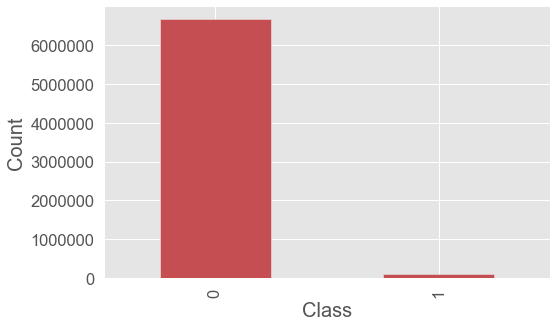

In [83]:
# Set figure font
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot bar
df['FATAL'].value_counts().plot(kind = 'bar', figsize = (8,5), color ='r')
plt.xlabel('Class', fontsize=20)
plt.ylabel('Count', fontsize=20)

 Let's look at the percentage of the class distribution

In [84]:
(df['FATAL'].value_counts()/df.shape[0])*100 

0    98.339034
1     1.660966
Name: FATAL, dtype: float64

- This is an extremely imbalanced class problem, where the class of interest (in this case fatal accidents) is extremely small compared to the other class 

- The majority (negative) class contains 98% of the class distribution, whereas the minority (positive) class is only 2% of the class distribution. 

In [86]:
# drop rows with missing values
df = df.dropna()

In [87]:
# save as csv dataframe
df.to_csv('../data/clean_data.csv', index= False)